# Bank Marketing Campaign Classification

In [1]:
import warnings 
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Bank Dataset/bank-additional/bank-additional-full.csv', sep = ";")
og_df = df.copy()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df_test = pd.read_csv('Bank Dataset/bank-additional/bank-additional.csv', sep = ";")
df_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
df.shape

(41188, 21)

In [5]:
df_test.shape

(4119, 21)

In [6]:
df = (pd.merge(df,df_test, indicator=True, how='outer')
         .query('_merge=="left_only"')
         .drop('_merge', axis=1))
df.shape

(37068, 21)

## Checking for any missing values and duplicated values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37068 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37068 non-null  int64  
 1   job             37068 non-null  object 
 2   marital         37068 non-null  object 
 3   education       37068 non-null  object 
 4   default         37068 non-null  object 
 5   housing         37068 non-null  object 
 6   loan            37068 non-null  object 
 7   contact         37068 non-null  object 
 8   month           37068 non-null  object 
 9   day_of_week     37068 non-null  object 
 10  duration        37068 non-null  int64  
 11  campaign        37068 non-null  int64  
 12  pdays           37068 non-null  int64  
 13  previous        37068 non-null  int64  
 14  poutcome        37068 non-null  object 
 15  emp.var.rate    37068 non-null  float64
 16  cons.price.idx  37068 non-null  float64
 17  cons.conf.idx   37068 non-null 

In [8]:
df.duplicated().sum()

11

In [9]:
df[df.duplicated(keep = False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14156,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16820,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20073,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no


In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(37057, 21)

**NOTE: After removing the duplicated values, now our dataset is at 37057 observations!**

## Checking for any skewness and kurtosis (removing any outliers if present)

In [13]:
df.skew(axis = 0, skipna = True)

age               0.792042
duration          3.259341
campaign          4.822984
pdays            -4.938570
previous          3.793975
emp.var.rate     -0.723683
cons.price.idx   -0.232451
cons.conf.idx     0.304577
euribor3m        -0.708570
nr.employed      -1.040445
dtype: float64

* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
* If the skewness is between -1 and -0.5 or between 0.5 and 1, the data are moderately skewed
* If the skewness is less than -1 or greater than 1, the data are highly skewed

In [14]:
df.kurt(axis = 0, skipna = True)

age                0.828989
duration          20.189545
campaign          37.802262
pdays             22.391110
previous          19.633126
emp.var.rate      -1.064983
cons.price.idx    -0.830582
cons.conf.idx     -0.363861
euribor3m         -1.407974
nr.employed       -0.012207
dtype: float64

* High kurtosis is an indication that there is heavy outliers
* Low kurtosis is an indication of a lack of outliers

In [15]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37057.000000,37057.000000,37057.000000,37057.000000,37057.000000,37057.000000,37057.000000,37057.000000,37057.000000,37057.000000
mean,40.013817,258.485630,2.571282,962.691853,0.171088,0.081582,93.575277,-40.503281,3.621287,5167.096357
std,10.432631,259.814596,2.791897,186.375961,0.489453,1.571764,0.578788,4.631606,1.734554,72.092942
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [16]:
outliers = []
def detect_outliers_iqr(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1

    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

sample_outliers = detect_outliers_iqr(df[['duration', 'campaign', 'pdays', 'previous']])
print(sample_outliers)

       duration  campaign  pdays  previous
0           NaN       NaN    NaN       NaN
1           NaN       NaN    NaN       NaN
2           NaN       NaN    NaN       NaN
3           NaN       NaN    NaN       NaN
4           NaN       NaN    NaN       NaN
...         ...       ...    ...       ...
41182       NaN       NaN    9.0       1.0
41183       NaN       NaN    NaN       NaN
41185       NaN       NaN    NaN       NaN
41186       NaN       NaN    NaN       NaN
41187       NaN       NaN    NaN       1.0

[37057 rows x 4 columns]


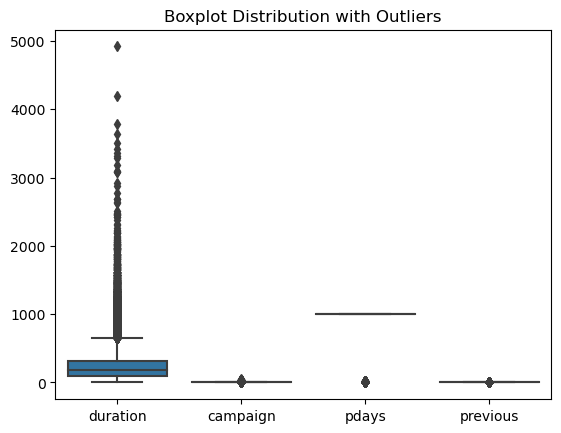

In [17]:
sns.boxplot(df[['duration', 'campaign', 'pdays', 'previous']])
plt.title('Boxplot Distribution with Outliers')
plt.show()

* Due to the large amount of outliers, we decided it would be best to capped the upper limit for the variable duration

* Whereas the outliers for the other variables we will replace them with the median values

In [18]:
# Capping the Upper Limit
ninetieth_percentile = np.percentile(df['duration'], 90)
df['duration'] = np.where(df['duration'] > ninetieth_percentile, ninetieth_percentile, df['duration'])
df.describe()['duration']

count    37057.000000
mean       227.063254
std        160.281976
min          0.000000
25%        102.000000
50%        179.000000
75%        319.000000
max        551.000000
Name: duration, dtype: float64

In [19]:
# Median Imputation Function 
def impute_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    
    upper = df[~(df>(q3+1.5*IQR))].max()
    lower = df[~(df<(q1-1.5*IQR))].min()
    df = np.where(df > upper, df.median(), np.where(df < lower, df.median(), df))
    
    return df
df['campaign'] = impute_outliers_IQR(df['campaign'])
df['pdays'] = impute_outliers_IQR(df['pdays'])
df['previous'] = impute_outliers_IQR(df['previous'])
df.describe()[['campaign', 'pdays', 'previous']]

,campaign,pdays,previous
count,37057.000000,37057.0,37057.0
mean,2.041288,999.0,0.0
std,1.242712,0.0,0.0
min,1.000000,999.0,0.0
25%,1.000000,999.0,0.0
50%,2.000000,999.0,0.0
75%,3.000000,999.0,0.0
max,6.000000,999.0,0.0


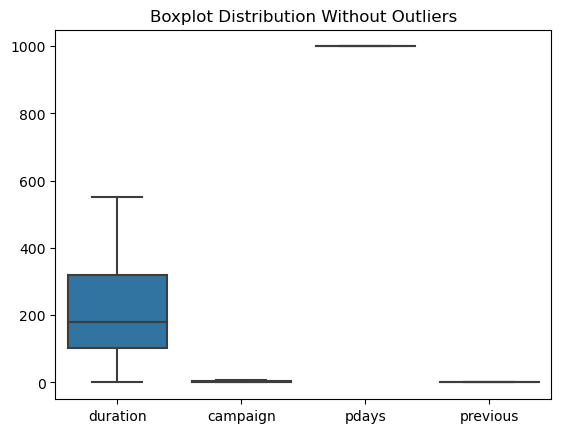

In [20]:
sns.boxplot(df[['duration', 'campaign', 'pdays', 'previous']])
plt.title('Boxplot Distribution Without Outliers')
plt.show()

In [21]:
df.skew(axis = 0, skipna = True)

age               0.792042
duration          0.807699
campaign          1.355049
pdays             0.000000
previous          0.000000
emp.var.rate     -0.723683
cons.price.idx   -0.232451
cons.conf.idx     0.304577
euribor3m        -0.708570
nr.employed      -1.040445
dtype: float64

In [22]:
df.kurt(axis = 0, skipna = True)

age               0.828989
duration         -0.481956
campaign          1.359075
pdays             0.000000
previous          0.000000
emp.var.rate     -1.064983
cons.price.idx   -0.830582
cons.conf.idx    -0.363861
euribor3m        -1.407974
nr.employed      -0.012207
dtype: float64

The skewness and kurtosis for each numerical variables is a lot better after handling the outliers compared to what it was before!

## Final Look into the Numerical Variables After Dealing with Outliers

In [23]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37057.000000,37057.000000,37057.000000,37057.0,37057.0,37057.000000,37057.000000,37057.000000,37057.000000,37057.000000
mean,40.013817,227.063254,2.041288,999.0,0.0,0.081582,93.575277,-40.503281,3.621287,5167.096357
std,10.432631,160.281976,1.242712,0.0,0.0,1.571764,0.578788,4.631606,1.734554,72.092942
min,17.000000,0.000000,1.000000,999.0,0.0,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.0,0.0,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,179.000000,2.000000,999.0,0.0,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.0,0.0,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,551.000000,6.000000,999.0,0.0,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Looking into the Categorical Variables

In [24]:
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 
           'poutcome']:
    print('-', col,'unique values:',df[col].unique())

- job unique values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
- marital unique values: ['married' 'single' 'divorced' 'unknown']
- education unique values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
- default unique values: ['no' 'unknown' 'yes']
- housing unique values: ['no' 'yes' 'unknown']
- loan unique values: ['no' 'yes' 'unknown']
- contact unique values: ['telephone' 'cellular']
- month unique values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
- day_of_week unique values: ['mon' 'tue' 'wed' 'thu' 'fri']
- poutcome unique values: ['nonexistent' 'failure' 'success']


In [25]:
df['poutcome'].value_counts()

nonexistent    32028
failure         3798
success         1231
Name: poutcome, dtype: int64

Here, we will refer 'nonexistent' to be the client not picking up their phone in to the calls made for a previous marketing campaign (poutcome)

In [26]:
# Drop default as the majority of the classes are no 
df['default'].value_counts()

no         29262
unknown     7793
yes            2
Name: default, dtype: int64

In [27]:
df_test['default'].value_counts()

no         3315
unknown     803
yes           1
Name: default, dtype: int64

In [28]:
df = df.replace('unknown', np.nan)
df_test = df_test.replace('unknown', np.nan)
df.isna().sum()

age                  0
job                291
marital             69
education         1563
default           7793
housing            885
loan               885
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [29]:
df = df.drop(columns=['default'])

# Change the NaN for other classes to the most frequent classes 
df['job'] = df['job'].fillna(df['job'].mode().iloc[0])
df['marital'] = df['marital'].fillna(df['marital'].mode().iloc[0])
df['education'] = df['education'].fillna(df['education'].mode().iloc[0])
df['housing'] = df['housing'].fillna(df['housing'].mode().iloc[0])
df['loan'] = df['loan'].fillna(df['loan'].mode().iloc[0])

df.isna().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [30]:
df_test = df_test.drop(columns=['default'])

df_test['job'] = df_test['job'].fillna(df_test['job'].mode().iloc[0])
df_test['marital'] = df_test['marital'].fillna(df_test['marital'].mode().iloc[0])
df_test['education'] = df_test['education'].fillna(df_test['education'].mode().iloc[0])
df_test['housing'] = df_test['housing'].fillna(df_test['housing'].mode().iloc[0])
df_test['loan'] = df_test['loan'].fillna(df_test['loan'].mode().iloc[0])